## VC_2_Lab_13_Face_Recognition_VGGFace2

Neste jupyter vamos fazer uso do VGGFace2 (http://www.robots.ox.ac.uk/~vgg/data/vgg_face2/) para reconhecimento e comparação de faces em imagens.

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) devendo o aluno carregar as imagens que estão compactadas no ZIP **Laboratório/face_recognition.zip** na pasta **VC_1/face_recognition/** dentro do seu Google Drive

### Visão Computacional 2

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [1]:
!pip install keras
!pip install mtcnn
!pip install keras_vggface

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Execute esta linha para conferir que seu Google Drive está devidamente montado (deve aparecer a pasta 'drive')

%ls -la

total 20
drwxr-xr-x 1 root root 4096 Nov 21 18:05 ./
drwxr-xr-x 1 root root 4096 Nov 21 18:03 ../
drwxr-xr-x 1 root root 4096 Nov 13 17:34 .config/
drwx------ 5 root root 4096 Nov 21 18:05 drive/
drwxr-xr-x 1 root root 4096 Nov 13 17:33 sample_data/


In [4]:
# Entrando no diretório

%cd /content/drive/MyDrive/Colab Notebooks/face_recognition

/content/drive/MyDrive/Colab Notebooks/face_recognition


In [5]:
# Listando o conteúdo

%ls -la

total 2615
-rw------- 1 root root  108688 Nov 21 00:28 bradley.jpg
-rw------- 1 root root  494696 Nov 21 00:26 jennifer.jpg
-rw------- 1 root root   79350 Nov 21 18:13 novaFoto1.jpg
-rw------- 1 root root   66438 Nov 21 18:14 novaFoto2.jpg
-rw------- 1 root root   51438 Nov 21 18:14 novaFoto4.jpg
-rw------- 1 root root   39857 Nov 20 21:55 photo1.jpg
-rw------- 1 root root  269102 Nov 20 22:16 photo2.jpg
-rw------- 1 root root 1226020 Nov 20 22:18 photo3.jpg
-rw------- 1 root root  106072 Nov 20 22:19 photo4.jpg
-rw------- 1 root root  196487 Nov 20 22:20 photo5.jpg
-rw------- 1 root root   36510 Nov 20 23:53 photo6.jpg


In [6]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

In [7]:
image_1 = plt.imread('photo1.jpg')
faces_bbox_1 = detector.detect_faces(image_1)
for face_bbox in faces_bbox_1:
    print(face_bbox)

{'box': [391, 13, 47, 63], 'confidence': 0.999996542930603, 'keypoints': {'left_eye': (403, 39), 'right_eye': (424, 41), 'nose': (411, 53), 'mouth_left': (400, 59), 'mouth_right': (421, 62)}}
{'box': [193, 76, 51, 69], 'confidence': 0.9999433755874634, 'keypoints': {'left_eye': (218, 103), 'right_eye': (237, 113), 'nose': (229, 122), 'mouth_left': (207, 123), 'mouth_right': (226, 133)}}
{'box': [444, 123, 52, 71], 'confidence': 0.9999337196350098, 'keypoints': {'left_eye': (457, 152), 'right_eye': (482, 152), 'nose': (468, 166), 'mouth_left': (457, 175), 'mouth_right': (482, 175)}}
{'box': [309, 14, 36, 56], 'confidence': 0.9998534917831421, 'keypoints': {'left_eye': (316, 36), 'right_eye': (334, 39), 'nose': (323, 49), 'mouth_left': (317, 57), 'mouth_right': (331, 58)}}
{'box': [359, 167, 59, 81], 'confidence': 0.999742329120636, 'keypoints': {'left_eye': (372, 197), 'right_eye': (401, 199), 'nose': (384, 215), 'mouth_left': (371, 224), 'mouth_right': (403, 225)}}
{'box': [274, 141, 5

In [8]:
from matplotlib.patches import Rectangle
def mark_faces(image, faces_bbox):
    plt.imshow(image)
    ax = plt.gca()
    # para cada face, imprime um retangulo
    for face_bbox in faces_bbox:
        x, y, width, height = face_bbox['box']
        face_border = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

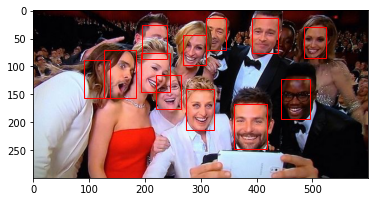

In [9]:
mark_faces(image_1, faces_bbox_1)

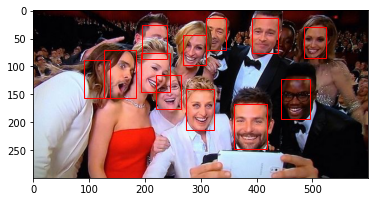

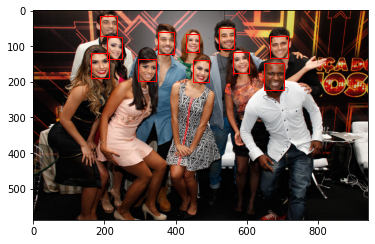

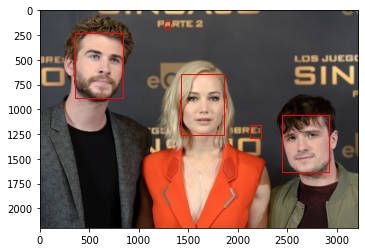

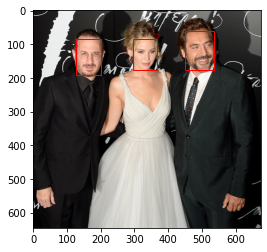

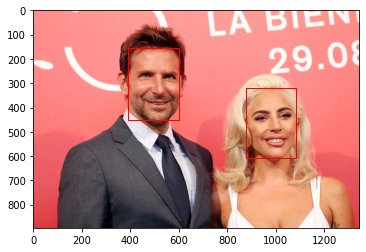

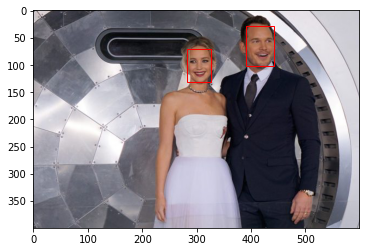

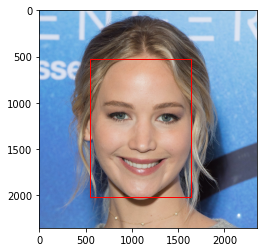

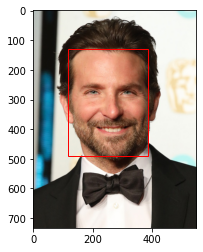

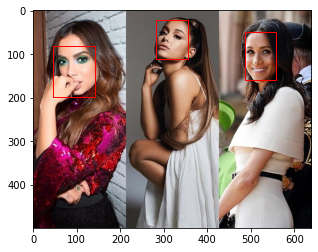

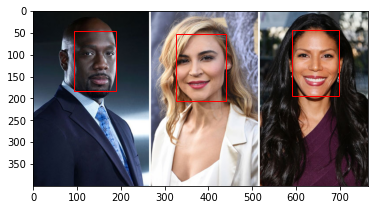

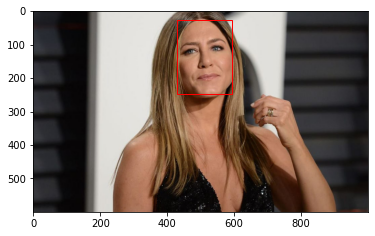

In [10]:
import os
for filename in os.listdir('.'):
  image = plt.imread(filename)
  faces_bbox = detector.detect_faces(image)
  mark_faces(image, faces_bbox)

In [11]:
from numpy import asarray
from PIL import Image
detector = MTCNN()
# Função para extrair um rosto na imagem
def extract_face(filename, new_size=(224, 224)):
    image = plt.imread(filename)
    faces_bbox = detector.detect_faces(image)  
    face_images = []
    for face_bbox in faces_bbox:
        x1, y1, width, height = face_bbox['box']
        x2, y2 = x1 + width, y1 + height
        face_boundary = image[y1:y2, x1:x2]
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(new_size)
        face_array = asarray(face_image)
        face_images.append(face_array)
    return face_images

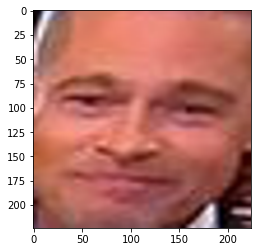

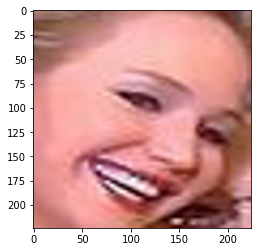

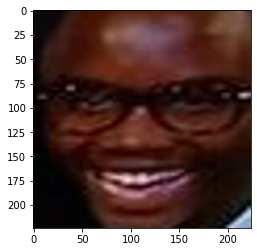

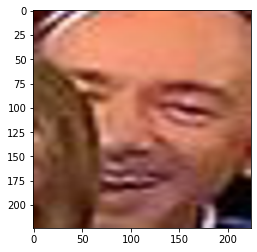

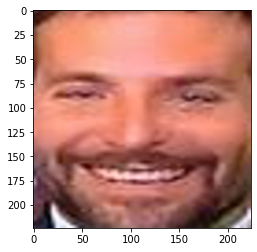

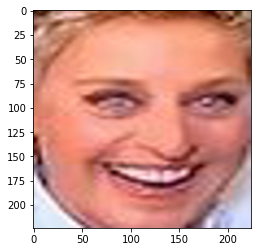

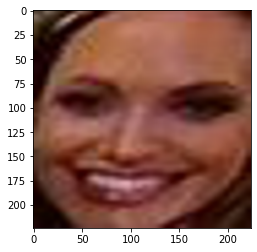

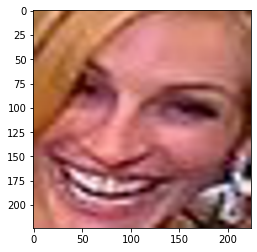

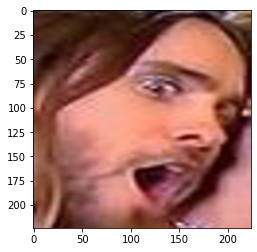

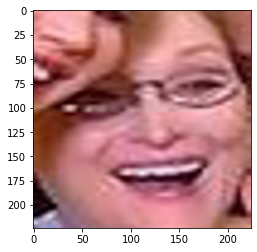

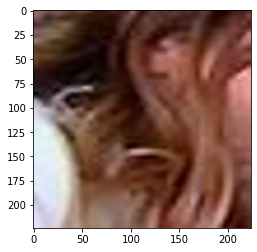

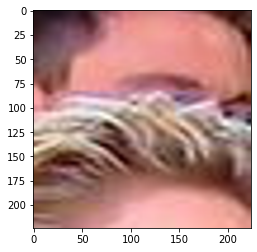

In [12]:
# Vamos testar com a primeira imagem
faces = extract_face('photo1.jpg')
for face in faces:
  plt.imshow(face)
  plt.show()

In [13]:
!pip install keras_applications
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
# cria uma rede VGG resnet50
model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')
# Função para calcular o model score (vetor que representa as características da face)
def model_scores(faces):
    samples = asarray(faces, 'float32')
    samples = preprocess_input(samples, version=2)
    # perform prediction
    return model.predict(samples)

6 2 0.3521823287010193


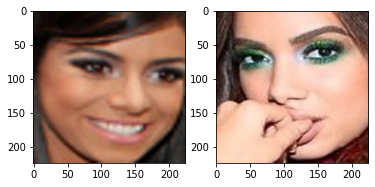

In [14]:
# Testando com a primeira imagem
faces1 = extract_face('photo2.jpg')
faces2 = extract_face('novaFoto1.jpg')
model_scores1 = model_scores(faces1)
model_scores2 = model_scores(faces2)

# Limiar a ser utilizado na comparação
THRESHOLD = 0.4
# Comparando as faces das duas fotos
for idx, face_score_1 in enumerate(model_scores1):
  for idy, face_score_2 in enumerate(model_scores2):
    score = cosine(face_score_1, face_score_2)
    if score <= THRESHOLD:
      print(idx, idy, score)
      f = plt.figure()
      f.add_subplot(1,2, 1)
      plt.imshow(faces1[idx])
      f.add_subplot(1,2, 2)
      plt.imshow(faces2[idy])
      plt.show(block=True)

In [15]:
# Agora com todas as imagens
def compare_images(path):
  done = []
  for filename_x in os.listdir(path):
    faces1 = extract_face(filename_x)
    model_scores1 = model_scores(faces1)
    for filename_y in os.listdir(path):
      if (filename_x != filename_y and '{}_{}'.format(filename_y,filename_x) not in done):
        done.append('{}_{}'.format(filename_x,filename_y))
        print('Comparing files {} and {}'.format(filename_x,filename_y))
        faces2 = extract_face(filename_y)
        model_scores2 = model_scores(faces2)  
        for idx, face_score_1 in enumerate(model_scores1):
          for idy, face_score_2 in enumerate(model_scores2):
            score = cosine(face_score_1, face_score_2)
            if score <= 0.25:
              print(idx, idy, score)
              f = plt.figure()
              f.add_subplot(1,2, 1)
              plt.imshow(faces1[idx])
              f.add_subplot(1,2, 2)
              plt.imshow(faces2[idy])
              plt.show(block=True)  
  print('Done!')              

Comparing files photo1.jpg and photo2.jpg
Comparing files photo1.jpg and photo3.jpg
Comparing files photo1.jpg and photo4.jpg
Comparing files photo1.jpg and photo5.jpg
Comparing files photo1.jpg and photo6.jpg
Comparing files photo1.jpg and jennifer.jpg
Comparing files photo1.jpg and bradley.jpg
4 0 0.24955713748931885


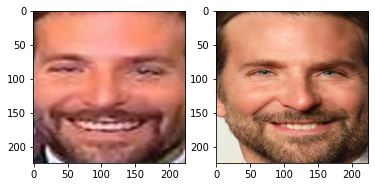

Comparing files photo1.jpg and novaFoto1.jpg
Comparing files photo1.jpg and novaFoto2.jpg
Comparing files photo1.jpg and novaFoto4.jpg
Comparing files photo2.jpg and photo3.jpg
Comparing files photo2.jpg and photo4.jpg
Comparing files photo2.jpg and photo5.jpg
Comparing files photo2.jpg and photo6.jpg
Comparing files photo2.jpg and jennifer.jpg
Comparing files photo2.jpg and bradley.jpg
Comparing files photo2.jpg and novaFoto1.jpg
Comparing files photo2.jpg and novaFoto2.jpg
Comparing files photo2.jpg and novaFoto4.jpg
Comparing files photo3.jpg and photo4.jpg
2 1 0.23246830701828003


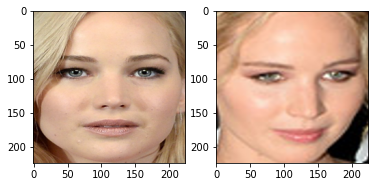

Comparing files photo3.jpg and photo5.jpg
Comparing files photo3.jpg and photo6.jpg
Comparing files photo3.jpg and jennifer.jpg
2 0 0.22960203886032104


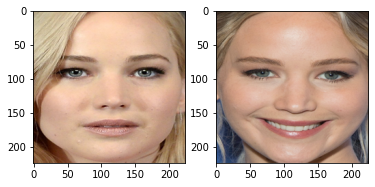

Comparing files photo3.jpg and bradley.jpg
Comparing files photo3.jpg and novaFoto1.jpg
Comparing files photo3.jpg and novaFoto2.jpg
Comparing files photo3.jpg and novaFoto4.jpg
Comparing files photo4.jpg and photo5.jpg
Comparing files photo4.jpg and photo6.jpg
Comparing files photo4.jpg and jennifer.jpg
1 0 0.21482253074645996


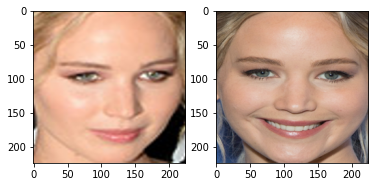

Comparing files photo4.jpg and bradley.jpg
Comparing files photo4.jpg and novaFoto1.jpg
Comparing files photo4.jpg and novaFoto2.jpg
Comparing files photo4.jpg and novaFoto4.jpg
Comparing files photo5.jpg and photo6.jpg
Comparing files photo5.jpg and jennifer.jpg
Comparing files photo5.jpg and bradley.jpg
1 0 0.17007231712341309


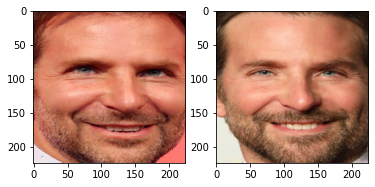

Comparing files photo5.jpg and novaFoto1.jpg
Comparing files photo5.jpg and novaFoto2.jpg
Comparing files photo5.jpg and novaFoto4.jpg
Comparing files photo6.jpg and jennifer.jpg
1 0 0.1827484369277954


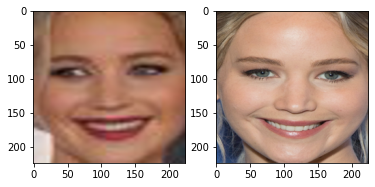

Comparing files photo6.jpg and bradley.jpg
Comparing files photo6.jpg and novaFoto1.jpg
Comparing files photo6.jpg and novaFoto2.jpg
Comparing files photo6.jpg and novaFoto4.jpg
Comparing files jennifer.jpg and bradley.jpg
Comparing files jennifer.jpg and novaFoto1.jpg
Comparing files jennifer.jpg and novaFoto2.jpg
Comparing files jennifer.jpg and novaFoto4.jpg
Comparing files bradley.jpg and novaFoto1.jpg
Comparing files bradley.jpg and novaFoto2.jpg
Comparing files bradley.jpg and novaFoto4.jpg
Comparing files novaFoto1.jpg and novaFoto2.jpg
Comparing files novaFoto1.jpg and novaFoto4.jpg
Comparing files novaFoto2.jpg and novaFoto4.jpg
Done!


In [16]:
compare_images('.')

# Exercício 13.1

Adicione novas imagens no diretório e faça novos testes. 

Altere o valor do THRESHOLD para ver o resultado. Qual o melhor valor?

**R:** O melhor valor é **0.25**, porque com esse limiar o modelo deixa de confundir a photo2 com a novaFoto1.



FIM